In [54]:
import pandas as pd
import numpy as np
import pingouin as pg
from scipy import stats

import seaborn as sns
%matplotlib inline

In [81]:
days = 100

In [82]:
# среднее значение, среднеквадратическое отклонение, размер выборки
mu_control, sigma_control, n_control = 100, 20, 100
mu_experement, sigma_experement, n_experement = 100.5, 20, 100

In [83]:
current_date = 1
user_data = pd.DataFrame()
stat_result = pd.DataFrame()
daily_data = pd.DataFrame()

In [87]:
for day in range(days):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experement = np.random.normal(mu_experement, sigma_experement, n_experement)
    
    day_data_control = pd.DataFrame({'value': daily_data_control})
    day_data_control['date'] = current_date
    day_data_control['group'] = 'control'
    
    day_data_experement = pd.DataFrame({'value': daily_data_experement})
    day_data_experement['date'] = current_date
    day_data_experement['group'] = 'experement'
    
    user_data = user_data.append(day_data_experement).append(day_data_control)
    fit = stats.ttest_ind(user_data[user_data.group == 'experement'].value,
                         user_data[user_data.group == 'control'].value)
    
    stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))
    
    current_data_stat = user_data.groupby(['group'], as_index=False).agg({'value': 'mean'})
    current_data_stat['date'] = current_date
    
    daily_data = daily_data.append(current_data_stat)
    
    current_date += 1

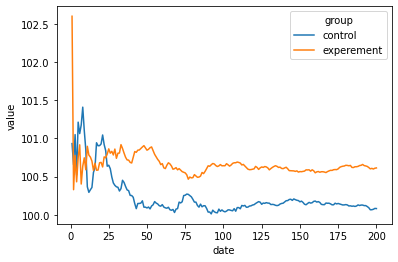

In [88]:
ax = sns.lineplot(data=daily_data, x='date', y='value', hue='group')

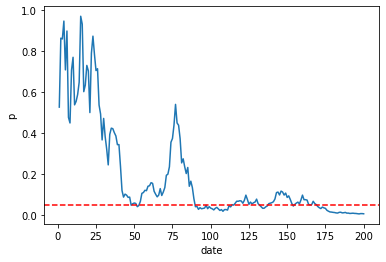

In [89]:
ax = sns.lineplot(data=stat_result, x='date', y='p')
ax.axhline(0.05, ls='--', color='red')